Original shape of data: (70000, 784)
Explained variance ratio (PCA): [0.10009538 0.07460617]


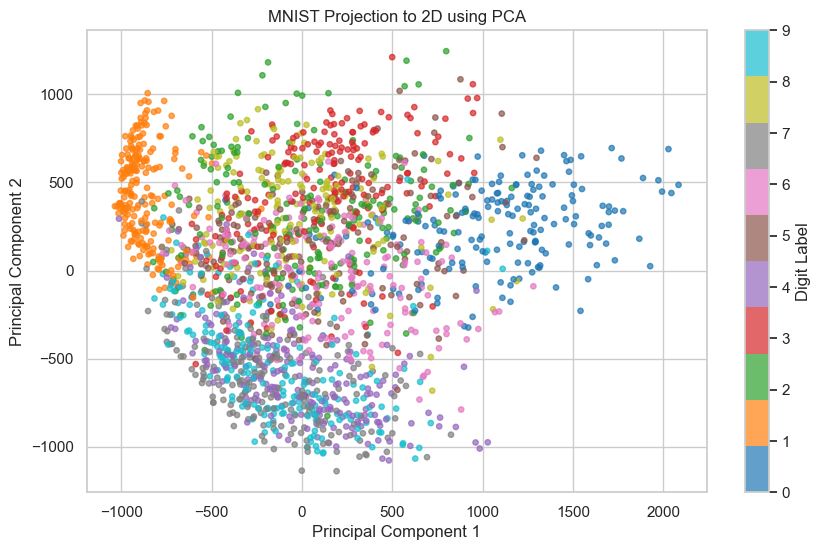

d:\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


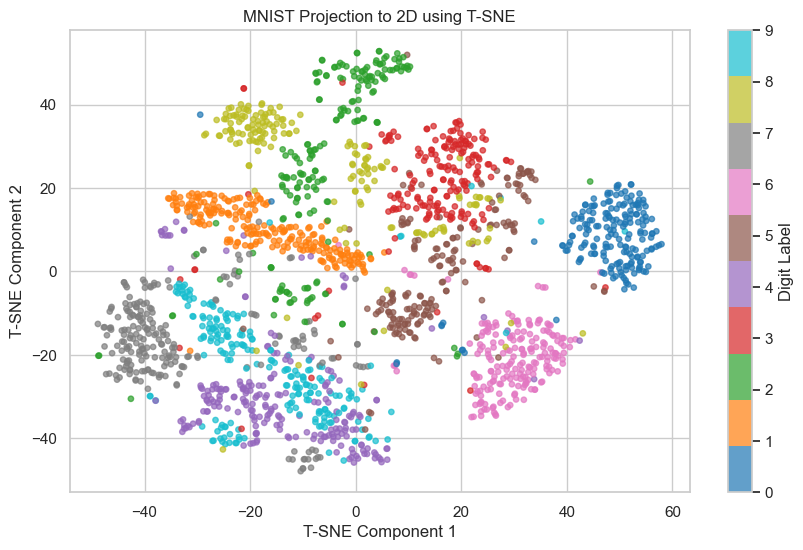

d:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


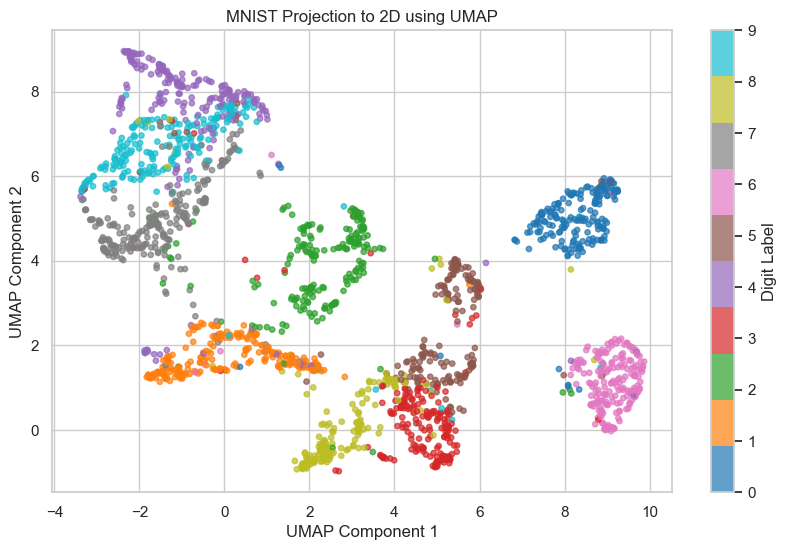

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.datasets import fetch_openml

# Set seaborn style for cleaner plots
sns.set(style='whitegrid')

# -------------------------------
# Load the MNIST dataset
# -------------------------------
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Check the shape of the dataset
print(f"Original shape of data: {X.shape}")  # (70000, 784) -> 70000 samples, 784 features (28x28 pixels per image)

# Use a smaller subset of the data for faster computation
SAMPLE_SIZE = 2000
X_sample = X[:SAMPLE_SIZE]
y_sample = y[:SAMPLE_SIZE]

# -------------------------------
# 1. Reduce Dimensionality using PCA (Principal Component Analysis)
# -------------------------------
# PCA reduces the dimensionality of the data while retaining as much variance as possible
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample)

# Print the explained variance ratio of each principal component
print(f"Explained variance ratio (PCA): {pca.explained_variance_ratio_}")

# Plot the PCA result
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_sample, cmap='tab10', alpha=0.7, s=15)
plt.colorbar(scatter, label='Digit Label')
plt.title("MNIST Projection to 2D using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# -------------------------------
# 2. Reduce Dimensionality using T-SNE (t-Distributed Stochastic Neighbor Embedding)
# -------------------------------
# T-SNE is more computationally expensive but helps in visualizing clusters in high-dimensional data
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_sample)

# Plot the T-SNE result
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample, cmap='tab10', alpha=0.7, s=15)
plt.colorbar(scatter, label='Digit Label')
plt.title("MNIST Projection to 2D using T-SNE")
plt.xlabel("T-SNE Component 1")
plt.ylabel("T-SNE Component 2")
plt.grid(True)
plt.show()

# -------------------------------
# 3. Reduce Dimensionality using UMAP (Uniform Manifold Approximation and Projection)
# -------------------------------
# UMAP is a non-linear dimensionality reduction technique similar to t-SNE, but faster and more scalable
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_sample)

# Plot the UMAP result
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_sample, cmap='tab10', alpha=0.7, s=15)
plt.colorbar(scatter, label='Digit Label')
plt.title("MNIST Projection to 2D using UMAP")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.grid(True)
plt.show()

# -------------------------------
# Conclusion
# -------------------------------
# By applying PCA, T-SNE, and UMAP, we can explore the MNIST dataset in 2D space.
# Each of these techniques has its own strengths and weaknesses:
# - PCA is a linear technique and preserves global variance.
# - T-SNE is better at capturing local structure but is computationally expensive.
# - UMAP is fast, scalable, and effective at preserving both local and global structure.
